# Phase 2 Notebook

3 main questions:
1. How do individual birdwatcher survey habits affect the number and location of specie sightings?
    - Did COVID have a significant impact on surveying in 2020?
2. Is there an association between geographic location and season, and what/how many species were sighted?
3. What is the forecast for the sightings of select species over the next 12 months?

## Load Data

This is the full range 2015-2020 in South America.

In [1]:
import pandas as pd

eod_data = pd.read_parquet('../data/0004691-251025141854904.parquet')
eod_data.head(n=1)

# derive event year from eventDate
eod_data['eventYear'] = eod_data['eventDate'].dt.year

# derive event month from eventDate
eod_data['eventMonth'] = eod_data['eventDate'].dt.month

# define meteorological seasons for south america
# Summer: December - February
# Autumn: March - May
# Winter: June - August
# Spring: September - November
seasons = {
    'summer': [12, 1, 2],
    'fall': [3, 4, 5],
    'winter': [6, 7, 8],
    'spring': [9, 10, 11]
}

def month_to_season(month):
    for season, months in seasons.items():
        if month in months:
            return season
    return None

eod_data['eventSeason'] = eod_data['eventMonth'].apply(month_to_season)

## Question 1

- How do individual birdwatcher survey habits affect the number and location of specie sightings?
- Did COVID have a significant impact on surveying in 2020?

Let's start by seeing who conducted the most checklists (surveys) overall.

In [44]:
from IPython.display import display
import altair as alt

birdwatcher_checklists = eod_data.groupby(['recordedBy', 'eventYear'])['checklist_id'].nunique()

birdwatcher_checklists_pivot = birdwatcher_checklists.reset_index().pivot(index='recordedBy', columns='eventYear', values='checklist_id').fillna(0)

birdwatcher_totals = birdwatcher_checklists_pivot.sum(axis=1)
year_totals = birdwatcher_checklists_pivot.sum(axis=0)
print('Total checklists:', year_totals.sum())

birdwatcher_checklists_pivot['Total Checklists'] = birdwatcher_totals
birdwatcher_checklists_pivot['% of All Checklists'] = round((birdwatcher_totals / year_totals.sum()) * 100.0, ndigits=3)
birdwatcher_checklists_pivot = birdwatcher_checklists_pivot.sort_values(by='% of All Checklists', ascending=False)
display(birdwatcher_checklists_pivot.head(n=10))

top_10_birdwatchers = birdwatcher_checklists_pivot.head(n=10).drop(columns=['Total Checklists', '% of All Checklists']).reset_index().melt(id_vars=['recordedBy'], var_name='Year', value_name='Checklists')
display(top_10_birdwatchers)

birdwatcher_selection = alt.selection_point(fields=['recordedBy'])
top_10_birdwatchers_bar = alt.Chart(top_10_birdwatchers).mark_bar().encode(
    x='recordedBy:N',
    y='Checklists:Q',
    color=alt.when(birdwatcher_selection).then(alt.Color('recordedBy:N')).otherwise(alt.value('lightgray')),
    tooltip=['recordedBy:N', 'Year:O', 'Checklists:Q']
).add_params(birdwatcher_selection).properties(
    title='Birdwatchers Checklists by Year',
    width=800,
    height=400
)

top_10_birdwatchers_line = alt.Chart(top_10_birdwatchers).mark_line(point=True).encode(
    x='Year:O',
    y='Checklists:Q',
    color=alt.Color('recordedBy', scale=alt.Scale(scheme='category20c')),
    tooltip=['recordedBy:N', 'Year:O', 'Checklists:Q']
).properties(
    title='Birdwatchers Checklists over Years',
    width=800,
    height=400
)

top_10_birdwatchers_bar | top_10_birdwatchers_line.add_params(birdwatcher_selection).transform_filter(birdwatcher_selection)

Total checklists: 1443530.0


eventYear,2015,2016,2017,2018,2019,2020,Total Checklists,% of All Checklists
recordedBy,,,,,,,,
obsr501068,377.0,762.0,952.0,1596.0,1722.0,884.0,6293.0,0.436
obsr643015,38.0,41.0,902.0,1111.0,2185.0,1039.0,5316.0,0.368
obsr428785,2.0,3.0,8.0,741.0,3631.0,758.0,5143.0,0.356
obsr635048,57.0,3406.0,0.0,37.0,0.0,1119.0,4619.0,0.320
obsr287680,578.0,606.0,555.0,913.0,701.0,547.0,3900.0,0.270
obsr626844,9.0,217.0,1165.0,821.0,950.0,613.0,3775.0,0.262
obsr241281,5.0,11.0,572.0,848.0,1269.0,1051.0,3756.0,0.260
obsr513345,27.0,584.0,493.0,890.0,1214.0,536.0,3744.0,0.259
obsr192735,202.0,363.0,1124.0,875.0,812.0,0.0,3376.0,0.234


,recordedBy,Year,Checklists
0,obsr501068,2015,377.0
1,obsr643015,2015,38.0
2,obsr428785,2015,2.0
3,obsr635048,2015,57.0
4,obsr287680,2015,578.0
5,obsr626844,2015,9.0
6,obsr241281,2015,5.0
7,obsr513345,2015,27.0
8,obsr192735,2015,202.0
9,obsr440632,2015,522.0


alt.HConcatChart(...)

There's 39,222 birdwatchers total.

So from 2015 to 2020, top birdwatcher was obsr501068 with 6293 checklists (surveys) conducted. They accounted for about 0.43% of all checklists from 2015-2020, which isn't very much. So no clear overall major contributors, probably don't need to account for any one birdwatcher skewing results overall.

While each birdwatcher might not contribute a significant portion of the overall surveys, they might have an outsized impact on certain regions.


In [3]:
checklists_by_observer_country_year = eod_data.groupby(['recordedBy', 'countryCode', 'eventYear'])['checklist_id'].nunique().reset_index()
checklists_by_observer_country_year_pivot = checklists_by_observer_country_year.pivot_table(index=['recordedBy', 'countryCode'], columns='eventYear', values='checklist_id', fill_value=0)

# calculate total checklists per country per birdwatcher
checklists_by_observer_country_year_pivot['Total Birdwatcher Checklists'] = checklists_by_observer_country_year_pivot.sum(axis=1).fillna(0)

# calculate total checklists in each country across all years/birdwatchers
country_checklist_totals = eod_data.groupby(['countryCode'])['checklist_id'].nunique()

# calculate percentage of checklists per country for each birdwatcher
def calculate_checklists_pct(row):
    country = row.name[1] # get countryCode from MultiIndex
    total_checklists_in_country = country_checklist_totals.get(country, 0)
    if total_checklists_in_country > 0:
        return round((row['Total Birdwatcher Checklists'] / total_checklists_in_country) * 100.0, ndigits=3)
    else:
        return 0.0
checklists_by_observer_country_year_pivot['% of Total Country Checklists'] = checklists_by_observer_country_year_pivot.apply(calculate_checklists_pct, axis=1)

display(checklists_by_observer_country_year_pivot.sort_values(by='% of Total Country Checklists', ascending=False).head(n=10))

,eventYear,2015,2016,2017,2018,2019,2020,Total Birdwatcher Checklists,% of Total Country Checklists
recordedBy,countryCode,,,,,,,,
obsr626844,CW,9.0,217.0,1165.0,795.0,950.0,613.0,3749.0,56.410
obsr161124,PA,1.0,0.0,0.0,0.0,0.0,0.0,1.0,50.000
obsr221425,PA,1.0,0.0,0.0,0.0,0.0,0.0,1.0,50.000
obsr614487,GF,11.0,49.0,369.0,529.0,465.0,575.0,1998.0,43.864
obsr494376,GY,161.0,155.0,362.0,247.0,178.0,172.0,1275.0,22.082
obsr660137,AW,50.0,22.0,192.0,319.0,246.0,330.0,1159.0,18.511
obsr601024,GF,0.0,0.0,0.0,0.0,321.0,474.0,795.0,17.453
obsr233415,FK,10.0,4.0,7.0,80.0,281.0,152.0,534.0,16.803
obsr518406,AW,20.0,114.0,173.0,134.0,270.0,316.0,1027.0,16.403


In some cases certain birdwatchers account for a large portion of the checklists for a given country. For example, obsr626844 contributed over 56% of Curaçao's checklists from 2015-2020.

Let's see how many checklists were conducted each season per year by birdwatchers overall.

In [52]:
checklists_by_season_year = eod_data.groupby(['eventYear', 'eventSeason'])['checklist_id'].nunique().sort_index().reset_index()
checklists_by_season_year = checklists_by_season_year.rename(columns={'checklist_id': 'totalChecklists'})
checklists_by_season_year['eventYear'] = checklists_by_season_year['eventYear'].astype(str)
checklists_by_season_year_pivot = checklists_by_season_year.pivot(index='eventYear', columns='eventSeason', values='totalChecklists').fillna(0)
display(checklists_by_season_year_pivot)

seasonal_checklists_line = alt.Chart(checklists_by_season_year).mark_line(point=True).encode(
    x='eventSeason:O',
    y='totalChecklists:Q',
    color=alt.Color('eventYear', scale=alt.Scale(scheme='category20c')),
    tooltip=['eventYear:O', 'eventSeason:O', 'totalChecklists:Q']
).properties(
    title='Seasonal Checklist Trends by Year',
    width=800,
    height=400
)

seasonal_checklists_line


eventSeason,fall,spring,summer,winter
eventYear,,,,
2015,16945,20299,18380,16711
2016,22136,29391,25399,20922
2017,31293,38320,34122,31053
2018,45651,54287,47651,42208
2019,59494,71591,67244,56112
2020,66260,76364,81044,59350


alt.Chart(...)

Spring and Summer seem to be when most checklists are conducted, indicating higher birdwatching activity during these seasons.

eventMonth,1,2,3,4,5,6,7,8,9,10,11,12
eventYear,,,,,,,,,,,,
2015,6081,5864,6050,4948,5947,4532,6310,5869,5444,7668,7187,6435
2016,8895,7896,7383,6811,7942,5966,7623,7333,8377,11208,9806,8608
2017,12163,10807,10145,8678,12470,8581,11725,10747,11955,13126,13239,11152
2018,16946,14207,14332,12380,18939,12439,15219,14550,15744,20120,18423,16498
2019,24427,19744,18937,17268,23289,16325,19560,20227,20685,26001,24905,23073
2020,29973,27210,20451,16489,29320,18781,19498,21071,22265,31041,23058,23861


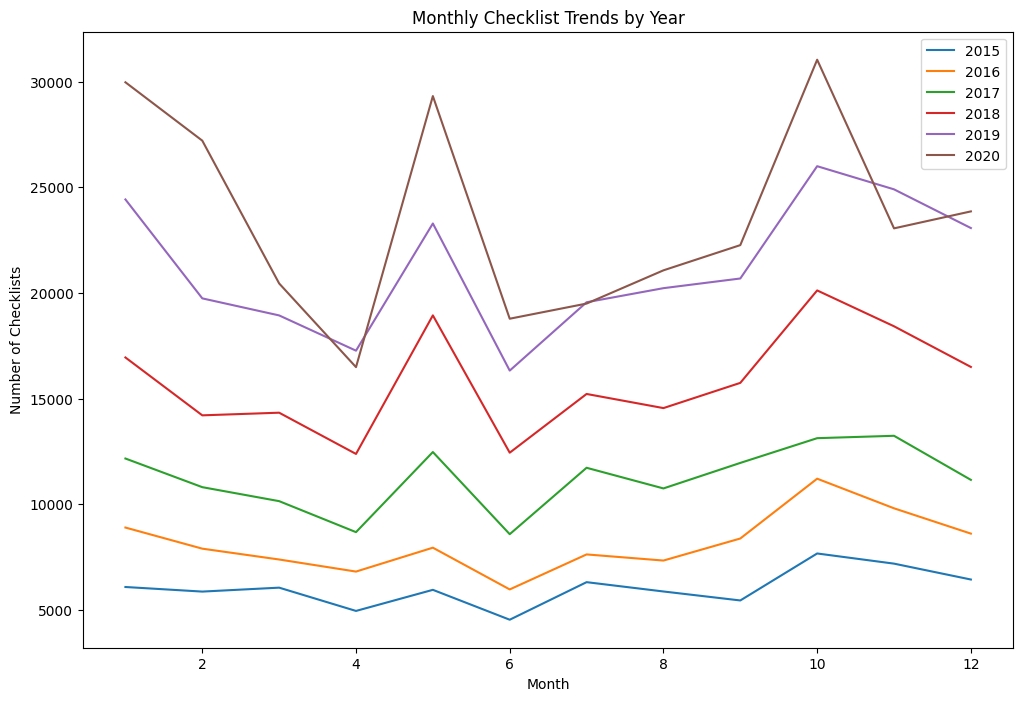

In [5]:
import matplotlib.pyplot as plt

# derive event month from eventDate
eod_data['eventMonth'] = eod_data['eventDate'].dt.month

checklists_by_month_year = eod_data.groupby(['eventYear', 'eventMonth'])['checklist_id'].nunique().sort_index().reset_index()
checklists_by_month_year = checklists_by_month_year.pivot(index='eventYear', columns='eventMonth', values='checklist_id')
display(checklists_by_month_year)

# for each year, plot its monthly trend line of surveys conducted
plt.figure(figsize=(12, 8))
plt.tight_layout()
for year in checklists_by_month_year.index:
    plt.plot(checklists_by_month_year.columns, checklists_by_month_year.loc[year], label=year)

plt.xlabel('Month')
plt.ylabel('Number of Checklists')
plt.title('Monthly Checklist Trends by Year')
plt.legend()
plt.show()

We can really see how much more popular eBird has become over time, which we'll need to account for when analyzing trends.

Regardless, there does seem to be some seasonality as to when birdwatcher conduct surveys/checklists consistent across years. There's a clear spike between April and July each year, as well as September to October. We see a noticeable dip in surveys from January to April each year. These seasonal trends will need accounting for when doing forecasting.

There doesn't seem to be much signs of COVID impacting the number of surveys conducted in 2020, as the seasonal trends are consistent with prior years. Trends seem more pronounced in 2020, with higher peaks and lower troughs, but that could just be due to the overall increase in eBird popularity and not necessarily COVID related.

Let's see where the surveys were conducted geographically.

In [6]:
checklists_by_country_year = eod_data.groupby(['countryCode', 'eventYear'])['checklist_id'].nunique().reset_index()
checklists_by_country_year = checklists_by_country_year.pivot(index='countryCode', columns='eventYear', values='checklist_id').fillna(0)
display(checklists_by_country_year)

eventYear,2015,2016,2017,2018,2019,2020
countryCode,,,,,,
AR,11498.0,16508.0,21878.0,29170.0,42221.0,49453.0
AW,798.0,900.0,987.0,1224.0,1236.0,1116.0
BO,1560.0,1497.0,2223.0,2997.0,3585.0,1978.0
BQ,369.0,679.0,419.0,658.0,797.0,807.0
BR,15190.0,20887.0,27515.0,35469.0,46811.0,66630.0
CL,10127.0,11654.0,19199.0,26431.0,35762.0,38246.0
CO,8782.0,16341.0,20927.0,35277.0,52209.0,59987.0
CW,172.0,430.0,1488.0,1498.0,1711.0,1347.0
EC,9802.0,9951.0,15124.0,18717.0,24683.0,19363.0


In [7]:
import altair as alt

# melt into long format for easier altair consumption
melted_checklists_by_country_year = checklists_by_country_year.reset_index().melt(id_vars='countryCode', var_name='eventYear', value_name='checklistCount')
display(melted_checklists_by_country_year.head(n=2))

# see https://altair-viz.github.io/gallery/simple_line_chart.html
chart1 = alt.Chart(melted_checklists_by_country_year).mark_line(point=True).encode(
    x='eventYear:O',
    y='checklistCount:Q',
    color=alt.Color('countryCode:N', scale=alt.Scale(scheme='category20c')), # see https://vega.github.io/vega/docs/schemes/#reference
    tooltip=['countryCode:N', 'eventYear:O', 'checklistCount:Q']
).properties(
    title='Country-wise Checklists by Year',
    width=700,
    height=500
)

country_selection = alt.selection_point(fields=['countryCode'])

bar = alt.Chart(melted_checklists_by_country_year).mark_bar().encode(
    x=alt.X('countryCode', title='Country').scale(domain=sorted(melted_checklists_by_country_year['countryCode'].unique())),
    y=alt.Y('checklistCount:Q', title='Total Checklists'),
    color=alt.when(country_selection).then(alt.Color('countryCode:N').scale(domain=sorted(melted_checklists_by_country_year['countryCode'].unique()))).otherwise(alt.value('lightgray')),
    tooltip=[alt.Tooltip('countryCode:N', title='Country'), alt.Tooltip('checklistCount:Q', title='Total Checklists')],
).add_params(
    country_selection
).properties(
    width=300,
    height=400,
    title='Total Checklists per Country').interactive()

bar | chart1.add_params(country_selection).transform_filter(country_selection)

,countryCode,eventYear,checklistCount
0,AR,2015,11498.0
1,AW,2015,798.0


alt.HConcatChart(...)

## Question 2

- Is there an association between geographic location and season, and what/how many species were sighted?


Naturally, we'd expect more species to be sighted when more surveys are being conducted. Let's see if that's the case by plotting the number of sightings per season each year. We'll only be able to consider rows where the individualCount field isn't null, since that field indicates how many individuals of a given species were sighted in a survey. If it's null, we can't assume anything about the number of sightings for that species in that survey.

(28137952, 14)


eventSeason,fall,spring,summer,winter
eventYear,,,,
2015,3744759.0,4006775.0,3926543.0,3055977.0
2016,4788049.0,6055578.0,5506098.0,3849882.0
2017,6086787.0,9287601.0,7462197.0,5193705.0
2018,11787904.0,14869068.0,12684044.0,9151265.0
2019,11256091.0,21514705.0,14255575.0,13164046.0
2020,8835223.0,12113405.0,17416770.0,9204817.0


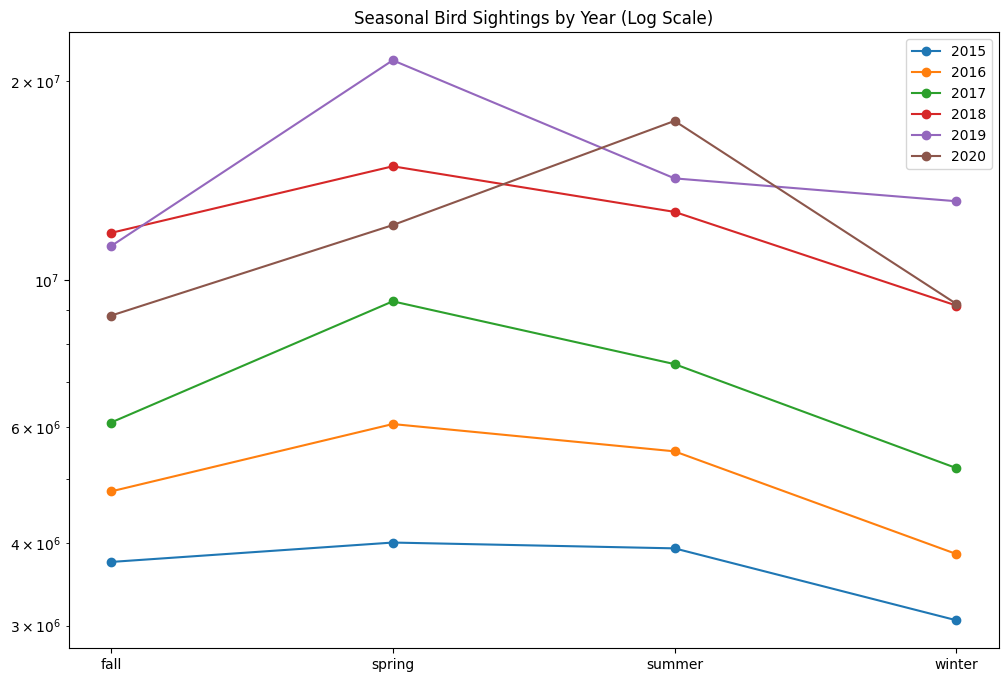

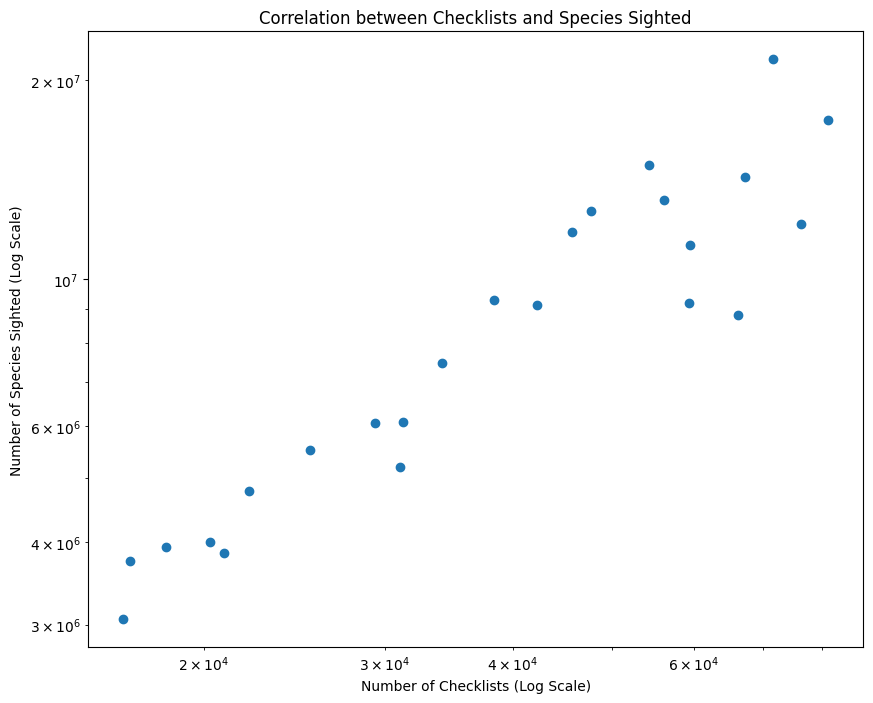

In [9]:
# discard rows where individualCount is null
observations_by_season_year = eod_data.loc[eod_data['individualCount'].notnull()]
print(observations_by_season_year.shape)

# count number of obervations (sightings) per season per year
observations_by_season_year = observations_by_season_year.groupby(['eventYear','eventSeason'])['individualCount'].sum().sort_index().reset_index()

observations_by_season_year = observations_by_season_year.pivot(index='eventYear', columns='eventSeason', values='individualCount')
display(observations_by_season_year)

# for each year, plot its seasonal trend line of birds observed
plt.figure(figsize=(12, 8))
plt.tight_layout()
plt.yscale('log')
plt.title('Seasonal Bird Sightings by Year (Log Scale)')
for year in observations_by_season_year.index:
    plt.plot(observations_by_season_year.columns, observations_by_season_year.loc[year], marker='o', label=year)
    plt.legend()

# correlation plot of checklists vs species sighted
plt.figure(figsize=(10, 8))
plt.scatter(checklists_by_season_year.values.flatten(), observations_by_season_year.values.flatten())
plt.xscale('log')
plt.yscale('log')
plt.xlabel('Number of Checklists (Log Scale)')
plt.ylabel('Number of Species Sighted (Log Scale)')
plt.title('Correlation between Checklists and Species Sighted')
plt.show()

That's nice, the trend seems to hold. From Fall to Spring, more species are sighted, tapering off in Summer. Again, Summer 2020 seems to defy the trend with a noticeable increase in species sighted compared to prior years. Our correlation plots a pretty strong, positive correlation between checklists conducted and species sighted.

Interestingly, despite 2019 having less checklists completed across the board than 2020, more species were sighted in 2019 than in 2020 for every season except Summer. 2018 also beat out 2020 in terms of number of sightings for Fall and Spring despite having less surveys conducted. Why is this? 

Let's see which countries had the most sightings overall from 2015-2020.

In [10]:
import altair as alt

observations_by_country_year = eod_data.loc[eod_data['individualCount'].notnull()]
observations_by_country_year = observations_by_country_year.groupby(['countryCode', 'eventYear'])['individualCount'].sum().reset_index()
observations_by_country_year = observations_by_country_year.pivot(index='countryCode', columns='eventYear', values='individualCount')
display(observations_by_country_year)


eventYear,2015,2016,2017,2018,2019,2020
countryCode,,,,,,
AR,3360525.0,5172613.0,5569490.0,10067649.0,10795590.0,11670237.0
AW,57769.0,78989.0,141506.0,142379.0,169843.0,163871.0
BO,269540.0,184467.0,306028.0,470999.0,358031.0,236784.0
BQ,87310.0,77734.0,63404.0,70179.0,121125.0,127630.0
BR,1640583.0,2064171.0,3074570.0,4053989.0,6605673.0,5752883.0
CL,3439119.0,4295598.0,4327155.0,7833798.0,6926524.0,6370584.0
CO,1513323.0,2180744.0,3126796.0,4905551.0,11923070.0,11762362.0
CW,19070.0,45638.0,177433.0,199431.0,284685.0,255974.0
EC,1291726.0,1390131.0,2267878.0,2651016.0,3943302.0,2220823.0


For some reason PA only had 67 sightings in total from 2015-2020, which seems suspiciously low. Let's double check the data for that country.

In [11]:
pa_observations = eod_data.loc[eod_data['countryCode'] == 'PA']
pa_observations.shape

(29, 14)

Only 29 rows for PA, even including those with null individualCount. Why might this be? Perhaps very few birdwatchers are active in PA?

In [12]:
# melt into long format for easier altair consumption
melted_observations = observations_by_country_year.reset_index().melt(id_vars='countryCode', var_name='eventYear', value_name='individualCount')
melted_observations['checklists'] = melted_checklists_by_country_year.set_index(['countryCode', 'eventYear']).loc[
    melted_observations.set_index(['countryCode', 'eventYear']).index]['checklistCount'].values
display(melted_observations.head(n=2))

# see https://altair-viz.github.io/gallery/simple_line_chart.html
chart2 = alt.Chart(melted_observations).mark_line(point=True).encode(
    x='eventYear:O',
    y='individualCount:Q',
    color=alt.Color('countryCode', scale=alt.Scale(scheme='category20c')), # see https://vega.github.io/vega/docs/schemes/#reference
    tooltip=['countryCode', 'eventYear:O', 'individualCount:Q', 'checklists']
).properties(
    title='Country-wise Bird Sightings by Year',
    width=700,
    height=500
)

country_selection = alt.selection_point(fields=['countryCode'])

bar = alt.Chart(melted_observations).mark_bar().encode(
    x=alt.X('countryCode', title='Country').scale(domain=sorted(melted_observations['countryCode'].unique())),
    y=alt.Y('individualCount:Q', title='Total Observations'),
    color=alt.when(country_selection).then(alt.Color('countryCode:N').scale(domain=sorted(melted_observations['countryCode'].unique()))).otherwise(alt.value('lightgray')),
    tooltip=[alt.Tooltip('countryCode:N', title='Country'), alt.Tooltip('individualCount:Q', title='Total Observations')],
).add_params(
    country_selection
).properties(
    width=300,
    height=400,
    title='Total Observations per Country').interactive()

bar | chart2.add_params(country_selection).transform_filter(country_selection)

,countryCode,eventYear,individualCount,checklists
0,AR,2015,3360525.0,11498.0
1,AW,2015,57769.0,798.0


alt.HConcatChart(...)

AR, PE, CO, CL, and BR are the top 5 countries in terms of total sightings from 2015-2020. 

From the bar chart, it looks like AW, BQ, CW, GF, GY, PA, and SR have similar low amounts of sightings.

Let's look at how sightings varied by season for each country.


In [13]:
observations_by_country_season = eod_data.loc[eod_data['individualCount'].notnull()]
observations_by_country_season = observations_by_country_season.groupby(['countryCode', 'eventSeason'])['individualCount'].sum().reset_index()
observations_by_country_season = observations_by_country_season.pivot(index='countryCode', columns='eventSeason', values='individualCount').fillna(0)
display(observations_by_country_season)


eventSeason,fall,spring,summer,winter
countryCode,,,,
AR,9876005.0,13066781.0,15055937.0,8637381.0
AW,228011.0,235573.0,136826.0,153947.0
BO,358422.0,799363.0,322206.0,345858.0
BQ,136888.0,151348.0,199800.0,59346.0
BR,3967202.0,8169785.0,4703608.0,6351274.0
CL,6237455.0,8265751.0,13772842.0,4916730.0
CO,8413766.0,9051821.0,7284437.0,10661822.0
CW,232447.0,279411.0,284885.0,185488.0
EC,2534417.0,3709026.0,3831254.0,3690179.0


In [14]:
# melt into long format for easier altair consumption
melted_observations_by_country_season = observations_by_country_season.reset_index().melt(id_vars='countryCode', var_name='eventSeason', value_name='individualCount')
display(melted_observations_by_country_season.head(n=2))

chart3 = alt.Chart(melted_observations_by_country_season).mark_line(point=True).encode(
    x='eventSeason:O',
    y='individualCount:Q',
    color=alt.Color('countryCode:N', scale=alt.Scale(scheme='category20c')),
    tooltip=['countryCode:N', 'eventSeason:O', 'individualCount:Q']
).properties(
    title='Country-wise Bird Sightings by Season',
    width=700,
    height=500
)

bar | chart3.add_params(country_selection).transform_filter(country_selection)

,countryCode,eventSeason,individualCount
0,AR,fall,9876005.0
1,AW,fall,228011.0


alt.HConcatChart(...)

Most countries see higher sightings in Spring and Summer. The only exception seems to be CO, which peaks in Winter by a substantial margin.

So there does seem to be an association between geographic location and season in terms of number of species sighted. Most countries see more sightings in Spring and Summer, except for CO which peaks in Winter.

## Question 3
- What is the forecast for the sightings of select species for the next 12 months?

We'll start by looking at Pyrrhura Frontalis (maroon-bellied parakeet).

In [15]:
frontalis_data = eod_data.loc[(eod_data['species'] == 'Pyrrhura frontalis') & (eod_data['individualCount'].notnull())]
print(frontalis_data.shape)

# format as time series
frontalis_data['yearMonth'] = frontalis_data['eventDate'].dt.to_period('M').astype(str)
frontalis_ts = frontalis_data.groupby('yearMonth')['individualCount'].sum()
display(frontalis_ts.head(n=5))

# plot individualCount over year-months with altair
frontalis_chart = alt.Chart(frontalis_ts.reset_index()).mark_line(point=True).encode(
    x='yearMonth:T',
    y='individualCount:Q',
    tooltip=['yearMonth:T', 'individualCount:Q']
).properties(
    title='Pyrrhura Frontalis Sightings over Time',
    width=900,
    height=500
)
frontalis_chart


(22295, 14)


/tmp/ipykernel_2724822/883870201.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  frontalis_data['yearMonth'] = frontalis_data['eventDate'].dt.to_period('M').astype(str)


yearMonth
2015-01     459.0
2015-02     205.0
2015-03     279.0
2015-04     472.0
2015-05    1415.0
Name: individualCount, dtype: float64

alt.Chart(...)

Since we suspect seasonality, we'll use a SARIMA model for forecasting. First we need to check if the time series is stationary.

In [16]:
# check stationarity with ADF test
from statsmodels.tsa.stattools import adfuller
adf_result = adfuller(frontalis_ts)
print('ADF Statistic:', adf_result[0])
print('p-value:', adf_result[1])
for key, value in adf_result[4].items():
    print(f'Critical Value {key}: {value}')

if adf_result[1] < 0.05:
    print("The time series is stationary.")
else:
    print("The time series is not stationary.")

ADF Statistic: -0.8115570933258065
p-value: 0.8157036642805422
Critical Value 1%: -3.5463945337644063
Critical Value 5%: -2.911939409384601
Critical Value 10%: -2.5936515282964665
The time series is not stationary.


Since our time series isn't stationary, we'll need to difference it to make it stationary. We can do this with the seasonal and non-seasonal differencing parameters for the model. Let's check the ACF and PACF plots to help us choose appropriate parameters for the SARIMA model.

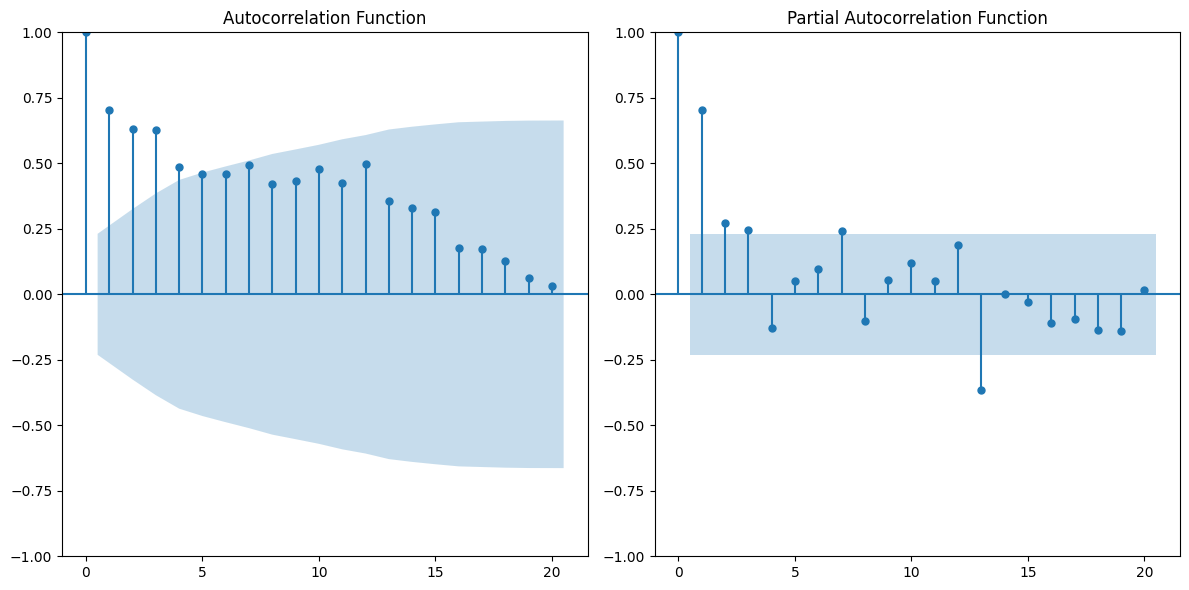

In [17]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
import matplotlib.pyplot as plt

# Plot ACF and PACF
plt.figure(figsize=(12, 6))
plt.subplot(121)
plot_acf(frontalis_ts, lags=20, ax=plt.gca())
plt.title('Autocorrelation Function')

plt.subplot(122)
plot_pacf(frontalis_ts, lags=20, ax=plt.gca())
plt.title('Partial Autocorrelation Function')

plt.tight_layout()
plt.show()

In [18]:
from statsmodels.tsa.statespace.sarimax import SARIMAX

model = SARIMAX(
    frontalis_ts,
    order=(1, 1, 0), # non-seasonal parameters (p, d, q)
    seasonal_order=(1, 1, 1, 12) # seasonal parameters (P, D, Q, s)
)
results = model.fit()
results.summary()

/home/noahg/.pyenv/versions/math316/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/home/noahg/.pyenv/versions/math316/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


<class 'statsmodels.iolib.summary.Summary'>
"""
                                      SARIMAX Results                                       
============================================================================================
Dep. Variable:                      individualCount   No. Observations:                   72
Model:             SARIMAX(1, 1, 0)x(1, 1, [1], 12)   Log Likelihood                -470.888
Date:                              Sat, 15 Nov 2025   AIC                            949.775
Time:                                      17:54:02   BIC                            958.086
Sample:                                  01-01-2015   HQIC                           953.019
                                       - 12-01-2020                                         
Covariance Type:                                opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.3628      0.158     -2.291      0.022      -0.673      -0.052
ar.S.L12      -0.2419      0.263     -0.921      0.357      -0.757       0.273
ma.S.L12      -0.6745      0.324     -2.083      0.037      -1.309      -0.040
sigma2      4.421e+05   1.17e+05      3.789      0.000    2.13e+05    6.71e+05
===================================================================================
Ljung-Box (L1) (Q):                   1.43   Jarque-Bera (JB):                 1.76
Prob(Q):                              0.23   Prob(JB):                         0.42
Heteroskedasticity (H):               4.75   Skew:                             0.31
Prob(H) (two-sided):                  0.00   Kurtosis:                         3.58
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [19]:
forecast = results.get_forecast(steps=12) # forecast 12 months ahead
forecast_index = pd.date_range(start=frontalis_ts.index[-1], periods=13, freq='ME')[1:] # adjust range for 12 months
forecast_values = forecast.predicted_mean

print(forecast_values)

# plot forecast alongside historical data using altair
forecast_df = pd.DataFrame({
    'yearMonth': forecast_index,
    'individualCount': forecast_values.values
})

forecast_chart = alt.Chart(forecast_df).mark_line(color='red', point=True).encode(
    x='yearMonth:T',
    y='individualCount:Q',
    tooltip=['yearMonth:T', 'individualCount:Q']
).properties(
    title='Forecasted Sightings',
    width=900,
    height=500
)
frontalis_chart + forecast_chart



2021-01-01    2534.577802
2021-02-01    2542.693671
2021-03-01    2455.945501
2021-04-01    2890.932214
2021-05-01    4036.808456
2021-06-01    3445.648184
2021-07-01    4280.940534
2021-08-01    3419.625166
2021-09-01    2804.198152
2021-10-01    3911.944275
2021-11-01    3064.682959
2021-12-01    2762.514634
Freq: MS, Name: predicted_mean, dtype: float64


alt.LayerChart(...)